In [62]:
## Support Vector Machine Classification applied to EEG data: Class 1 vs all
##
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
eeg_svm = pd.read_csv('eeg_class.csv')

In [64]:
eeg_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [65]:
Y = list(eeg_svm.pop('y'))

In [130]:
X1 = eeg_svm.values

In [67]:
pca = PCA(n_components=50)

In [68]:
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

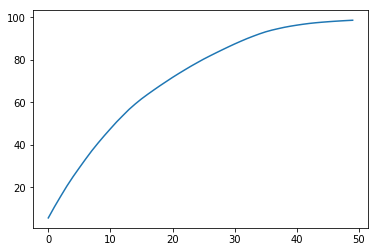

In [69]:
var= pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

In [70]:
X = pca.fit_transform(X1)
X.shape

(11500, 50)

In [71]:
# Cross Validation
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [93]:
# Cross Validation train test split of PC 
test_size = 0.30
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=0)

In [94]:
len(X_test)

3450

In [95]:
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

In [96]:
# Training od Principal Components by Support Vector Machine Classification (SVC)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
pred_svm = classifier.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_svm)
print(cm)

[[2759    0]
 [ 691    0]]


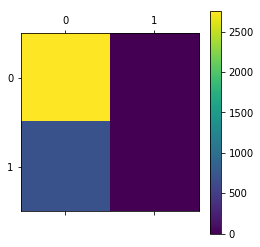

In [99]:
plt.matshow(cm)
plt.colorbar()
plt.show()

In [100]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, pred_svm))
accuracy = accuracy_score(Y_test, pred_svm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.799710144928
Accuracy: 79.97%


In [119]:
# Class 1 : seizure data
eeg_01 = pd.read_csv('eeg_class1.csv')

In [120]:
# Class 2 : non-seizure data but probe at epileptic zone
eeg_02 = pd.read_csv('eeg_class2.csv')

In [122]:
# Concatanating the two data sets into one with only two classes : 1 and 2 as y values
eeg_012 = pd.concat([eeg_01, eeg_02])

In [123]:
eeg_012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 2299
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 6.3 MB


In [127]:
eeg_012.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
1,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
2,-167,-230,-280,-315,-338,-369,-405,-392,-298,-140,...,423,434,416,374,319,268,215,165,103,1
3,410,451,491,541,581,641,736,757,692,435,...,415,428,463,510,562,607,667,748,763,1
4,-264,-189,-117,-45,20,70,111,143,161,179,...,-231,-221,-248,-321,-444,-530,-548,-536,-486,1


In [128]:
eeg_012.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
2295,62,68,75,75,75,77,81,85,82,81,...,-1,-2,-1,9,18,22,30,36,41,2
2296,-18,-12,-5,-4,-3,-9,-16,-27,-35,-49,...,-63,-58,-51,-48,-41,-30,-26,-17,-17,2
2297,102,137,158,158,128,92,60,56,63,63,...,76,64,59,44,39,23,11,4,2,2
2298,-136,-137,-138,-135,-130,-123,-116,-118,-119,-119,...,-1,3,5,8,13,16,24,34,42,2
2299,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2


In [129]:
yy = list(eeg_012.pop('y'))

In [131]:
xx = eeg_012.values

In [132]:
# Cross Validation train and test split of the data 
test_size = 0.30
xx_train, xx_test, yy_train, yy_test = cross_validation.train_test_split(xx, yy, test_size=test_size, random_state=0)

In [134]:
# Scaling the data for Support Vector Machine Classification
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xx_train = sc.fit_transform(xx_train)
xx_test = sc.transform(xx_test)

In [135]:
# Converting y values as array
yy_train = np.asarray(yy_train)
yy_test = np.asarray(yy_test)

In [136]:
# Applying SVM Classification
classifier.fit(xx_train, yy_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [137]:
# Predicting by SVM Model
prediction = classifier.predict(xx_test)

In [138]:
# Confusion Matrix 
cm_012 = confusion_matrix(yy_test, prediction)
print(cm_012)

[[628  80]
 [ 23 649]]


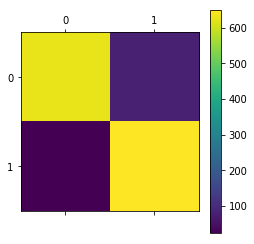

In [139]:
plt.matshow(cm_012)
plt.colorbar()
plt.show()

In [140]:
print(metrics.accuracy_score(yy_test, prediction))
accuracy_012 = accuracy_score(yy_test, prediction)
print("Accuracy: %.2f%%" % (accuracy_012 * 100.0))

0.925362318841
Accuracy: 92.54%


In [153]:
print("Miscalculation")
print(1 - metrics.accuracy_score(yy_test, prediction))
##
print("Recall")
print(metrics.recall_score(yy_test, prediction))
##
precision = metrics.precision_score(yy_test, prediction)
print("Precision Score: %.2f%%" % (precision * 100))


Miscalculation
0.0746376811594
Recall
0.887005649718
Precision Score: 96.47%


In [ ]:
# Class 1 vs Class 2 SVM Model is 92.5% accurate in prediction of seizure cases

In [154]:
eeg_03 = pd.read_csv('eeg_class3.csv')

In [155]:
# Concatanating the data sets with only two classes : 1 and 3 as y values, Class 3 represents probe at healthy tissue
eeg_013 = pd.concat([eeg_01, eeg_03])

In [156]:
eeg_013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 2299
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 6.3 MB


In [157]:
eeg_013.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
2295,-61,-71,-77,-74,-74,-72,-72,-76,-77,-76,...,-51,-58,-68,-88,-98,-101,-102,-99,-96,3
2296,-68,-43,-24,-3,-15,-16,-15,-17,-19,-29,...,87,88,90,91,96,98,102,100,91,3
2297,7,30,16,10,17,23,42,31,34,39,...,190,152,132,104,56,41,63,126,193,3
2298,-39,-16,-13,-14,-68,-84,-92,-61,-89,-86,...,-102,-75,-63,-44,-66,-49,-34,-31,-52,3
2299,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


In [158]:
y3 = list(eeg_013.pop('y'))

In [159]:
x3 = eeg_013.values

In [160]:
# Cross Validation train and test split of the data 
test_size = 0.30
x3_train, x3_test, y3_train, y3_test = cross_validation.train_test_split(x3, y3, test_size=test_size, random_state=0)

In [162]:
x3_train = sc.fit_transform(x3_train)
x3_test = sc.transform(x3_test)

In [163]:
y3_train = np.asarray(y3_train)
y3_test = np.asarray(y3_test)

In [164]:
# Applying SVM Classification
classifier.fit(x3_train, y3_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [165]:
pred_3 = classifier.predict(x3_test)

In [166]:
cm_3 = confusion_matrix(y3_test, pred_3)
print(cm_3)

[[681  27]
 [ 12 660]]


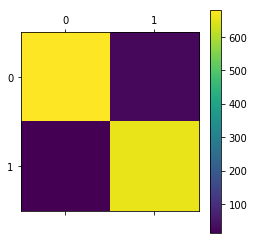

In [167]:
plt.matshow(cm_3)
plt.colorbar()
plt.show()

In [168]:
print(metrics.accuracy_score(y3_test, pred_3))
accuracy_3 = accuracy_score(y3_test, pred_3)
print("Accuracy: %.2f%%" % (accuracy_3 * 100.0))
##
print("Miscalculation")
print(1 - metrics.accuracy_score(y3_test, pred_3))
##
print("Recall")
print(metrics.recall_score(y3_test, pred_3))
##
precision = metrics.precision_score(y3_test, pred_3)
print("Precision Score: %.2f%%" % (precision * 100))

0.971739130435
Accuracy: 97.17%
Miscalculation
0.0282608695652
Recall
0.96186440678
Precision Score: 98.27%


In [ ]:
# Prediction score by SVM Model of epileptic seizure in reference to probe at healthy part is 97%
# Better that probe at epileptic zone by ~ 5% 
# Makes better sense to quantify seizure w.r.t. signals from healthy part of the brain
# Conditions to the data cannot be overruled to generalize a conclusion